Peyton Hall

QBIO460: Intro to Machine Learning

Assignment 9

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Input
from tensorflow.keras.optimizers import Adam

import time

In [4]:
file_path = '/Users/peytonhall/downloads/Max.txt'
maxDf = pd.read_csv(file_path, sep='\t', header=None)
maxDf

,0,1
0,GAAGCCCTGGCGGGGCGCGTGCCCGCCGCCGCCGCC,3.737829
1,TCCCGGGGCTAGAGGCATGTGGACTCAGGAGGATGA,3.895754
2,GGCGCTGCCGGACTGCGCGTGGAGTGGCGCGCTGCT,3.797545
3,GCAGCTCGCCCGGGCCACGCGGTGCCGGCCCTCGGC,4.080446
4,GGAATTACCTTCATCCACATGGTTGAAGCTGGCTGG,4.126748
...,...,...
8563,AGCAAAGCTGGCCCCCACGTTGTCCTTCCGCAGAAC,4.010130
8564,GGGACCCTGCCTTCCCGCGTGGCCGCACCGAGACGA,4.036789
8565,AGAAGAACCCGGGCGCACGTGGCCGACTCCAGGCTG,4.418053
8566,GGGGCCCGGGTGGGGCATGTGGGGACAACGCCTGGA,3.939968


Part 1: Build the First Neural Network

1. Data Encoding and Preparation: Encode the binding sequences using one-hot
encoding as in Assignment 1. Normalize binding affinities (y values) to a range of 0-1
using the min-max normalization method. Split the data into 80% for training and 20% for
validation. [0.5pt]

In [5]:
# one hot encoding for binding sequence
# make one hot encode function for sequences
def encodeMono(sequence):
    monoMap = {"A": [1, 0, 0, 0], "C": [0, 1, 0, 0], "G": [0, 0, 1, 0], "T": [0, 0, 0, 1]}
    encoded = []
    for mononucleotide in sequence:
        encoded.extend(monoMap[mononucleotide])
    return encoded

In [6]:
# apply encoding to binding sequence
# shape is 8568,144 (4lettercode x 36bases)
preMax = maxDf[0].tolist()
encodeMax = np.array([encodeMono(seq) for seq in preMax])

In [7]:
# min-max normalization
# make min-max normalization function
def normalizationFunct(shape):
    minShape = np.min(shape, axis=0)  # min
    maxShape = np.max(shape, axis=0)  # max
    y = (shape - minShape) / (maxShape - minShape)
    return y

In [8]:
# normalize the affinity
affinity = maxDf[1]
normalAffinity = normalizationFunct(affinity)
print(normalAffinity)

0       0.106881
1       0.232205
2       0.154269
3       0.378770
4       0.415513
          ...   
8563    0.322970
8564    0.344125
8565    0.646682
8566    0.267292
8567    0.720506
Name: 1, Length: 8568, dtype: float64


In [9]:
# split the data for validation
X_train, X_test, y_train, y_test = train_test_split(
    encodeMax, normalAffinity, test_size=0.2, random_state=22
)

# scale to prevent data leak
scaler = MinMaxScaler()
# fit scaler on training only
scaler.fit(X_train)

# transform both training and testing sets 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

2. Model Construction: Build a neural network with one hidden layer of 16 neurons and a
sigmoid activation function. Use a single neuron in the output layer with a linear
activation. Set the optimizer to Adam and use Mean Squared Error (MSE) as the
evaluation metric. Use a batch size of 64 and train the model for 50 epochs. [0.5pt]

In [18]:
# Define the model
model = Sequential()

model.add(Dense(16, input_shape=(X_train.shape[1],)))
model.add(Activation('sigmoid')) 

# Add a single neuron in the output layer with a linear activation
model.add(Dense(1))
model.add(Activation('linear'))  # Linear activation for output layer

# compile the model
# set the optimizer to Adam and use Mean Squared Error (MSE) as the loss function
model.compile(loss='mse', optimizer=Adam())

# model summary
model.summary()

# train the model with specified batch size and epochs
# add val data for getting val loss for plot
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0546 - val_loss: 0.0205
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.0180 - val_loss: 0.0126
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0107 - val_loss: 0.0085
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0076 - val_loss: 0.0068
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.0065 - val_loss: 0.0063
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.0060 - val_loss: 0.0061
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.0058 - val_loss: 0.0061
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.0060 - val_loss: 0.0064
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 12/50
108/108 ━━━━━━━━━━━━

3. Training and Performance Evaluation: Train the model and print the performance on
both training and testing datasets. Calculate and display the r-squared score for the
training and validation datasets. [0.5pt]

In [19]:
# train and print performance on training 
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


In [20]:
# calculate r-squared score
train_r2_1 = r2_score(y_train, train_predictions)
test_r2_1 = r2_score(y_test, test_predictions)

4. Plotting Results: Plot the training and validation loss curves, and report the
r-squared score for the validation set as an indicator of model fit. [0.5pt]

In [21]:
train_loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

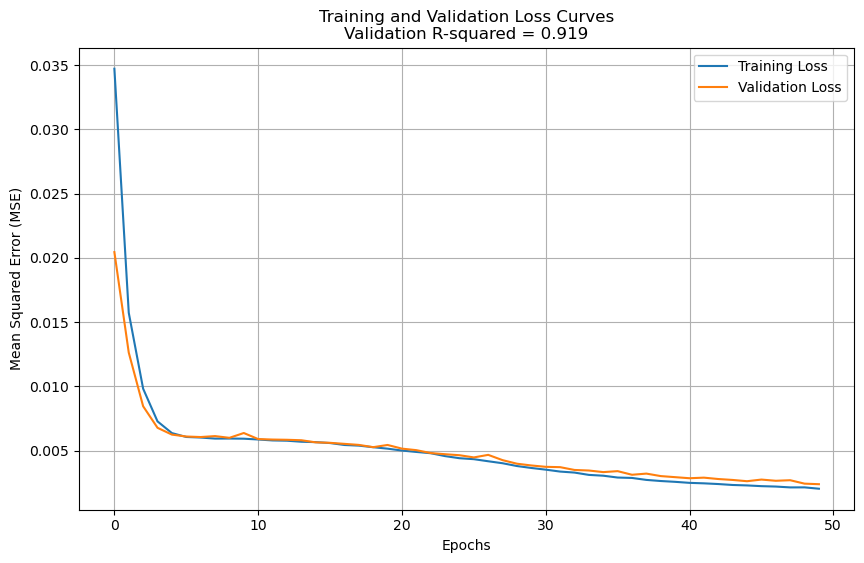

In [22]:
# plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss_1, label='Training Loss')
plt.plot(val_loss_1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Training and Validation Loss Curves\nValidation R-squared = {test_r2_1:.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
print(train_r2_1)
print(test_r2_1)

print(min(train_loss_1))
print(min(val_loss_1))

# validation had slightly lower R2 and slightly more loss 
# - performed a bit worse but not significantly

0.9329167706232624
0.9185021149902135
0.002044938039034605
0.0023967232555150986


Part 2: Neural Network Comparison - hidden layer size

1. Layer Configurations: Compare the performance of networks with the following hidden
layer sizes: 4, 8, 16, 32, 64, and 128 neurons. Keep other parameters constant, and
measure the impact of hidden layer size on the model’s performance. Train each
configuration for 50 epochs. [0.5pt]

2. Performance Evaluation: Record the r-squared score for each model. [0.5pt]

In [24]:
# compare with diff sizes 4, 8, 16, 32, 64, and 128

layerSize = [4, 8, 16, 32, 64, 128]

# initialize
val_losses_2 = []
train_losses_2 = []
r2_scores_2 = []


for i in layerSize:
    # Define the model
    model = Sequential()

    model.add(Input(shape=(X_train.shape[1],))) 
    
    # change layer size with sigmoid function
    model.add(Dense(i, activation='sigmoid'))  
    # single neuron in the output layer with a linear activation
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    # set the optimizer to Adam and use Mean Squared Error (MSE) as the loss function
    model.compile(loss='mse', optimizer=Adam())

    history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))
    
    # store epoch info into empty list
    train_losses_2.append(history.history['loss'][-1])
    val_losses_2.append(history.history['val_loss'][-1])
    
    # record r2 scores for each model
    y_test_pred = model.predict(X_test)
    r2_2 = r2_score(y_test, y_test_pred)
    r2_scores_2.append(r2_2)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6913 - val_loss: 0.0462
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.0408 - val_loss: 0.0319
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.0302 - val_loss: 0.0303
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0308 - val_loss: 0.0291
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.0285 - val_loss: 0.0278
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0272 - val_loss: 0.0265
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.0263 - val_loss: 0.0252
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.0248 - val_loss: 0.0238
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.0232 - val_loss: 0.0224
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.0216 - val_loss: 0.0210
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.0199 - val_loss: 0.0196
Epoch 12/50
108/108 ━━━━━━━━━━━━

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0049 - val_loss: 0.0052
Epoch 34/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0048 - val_loss: 0.0051
Epoch 35/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0045 - val_loss: 0.0056
Epoch 36/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0046 - val_loss: 0.0049
Epoch 37/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.0045 - val_loss: 0.0049
Epoch 38/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.0045 - val_loss: 0.0051
Epoch 39/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.0042 - val_loss: 0.0048
Epoch 40/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0043 - val_loss: 0.0047
Epoch 41/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0040 - val_loss: 0.0042
Epoch 42/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.0038 - val_loss: 0.0041
Epoch 43/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0036 - val_loss: 0.0041
Epoch 44/50
108/108 ━━━━━━━━━━━━━

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0068 - val_loss: 0.0075
Epoch 15/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0067 - val_loss: 0.0063
Epoch 16/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.0066 - val_loss: 0.0064
Epoch 17/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0063 - val_loss: 0.0067
Epoch 18/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0064 - val_loss: 0.0067
Epoch 19/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0066 - val_loss: 0.0072
Epoch 20/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 21/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.0062 - val_loss: 0.0077
Epoch 22/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0066 - val_loss: 0.0068
Epoch 23/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0058 - val_loss: 0.0059
Epoch 24/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 25/50
108/108 ━━━━━━━━━━━━━

3. Plotting Results: Plot the training and validation loss curves to visualize the model's
learning process. Additionally, create a bar plot displaying the r-squared score as a
function of the number of neurons in the hidden layer. [0.5pt]

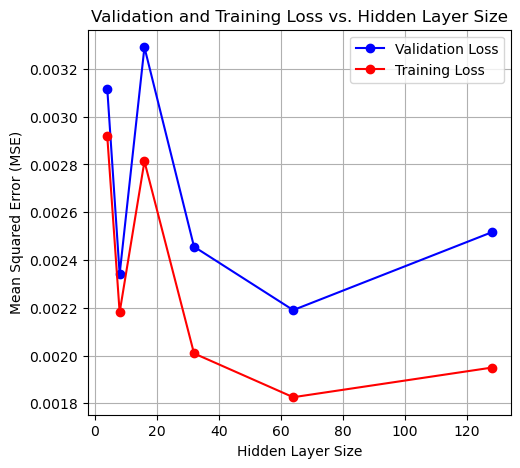

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(layerSize, val_losses_2, marker='o', color='blue', label='Validation Loss')
plt.plot(layerSize, train_losses_2, marker='o', color='red', label='Training Loss')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation and Training Loss vs. Hidden Layer Size')
plt.legend()
plt.grid(True)

plt.show()

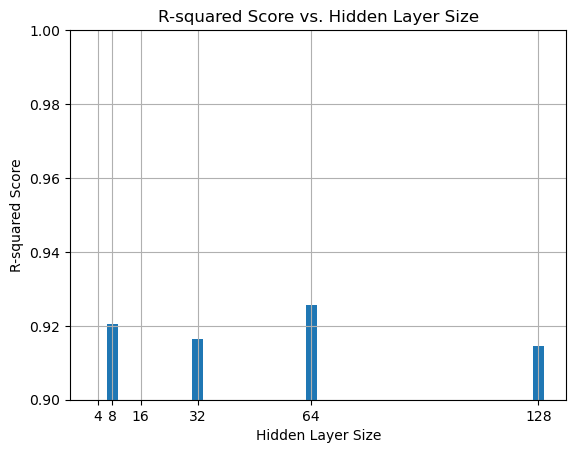

In [30]:
# r2 vs hidden layer bar plot
plt.bar(layerSize, r2_scores_2,width=3)
plt.xlabel('Hidden Layer Size')
plt.xticks(layerSize)
plt.ylabel('R-squared Score')

# r clarity if the R-squared scores are close.
plt.ylim(0.9, 1.0)
plt.title('R-squared Score vs. Hidden Layer Size')
plt.grid(True)

plt.show()

4. Discussion: Discuss how changing the number of neurons affects model performance.
Highlight any trade-offs observed, such as overfitting in larger models or underfitting in
smaller ones. [0.5pt]

ANSWER: Overall, increasing the number of neurons can improve model performance, but there's more nuance to this. 64 neuorns performed performed the best. It performed better than 16 since 16 neurons may have been too small of a layer size to adequately detect signals across the data. However, 128 neurons seemed to be too big of a model, contributing to overfitting. 



Part 3: Neural Network Comparison - number of hidden layers

1. Layer Configurations: Compare the performance of networks with 1 to 10 hidden
layers, each containing the optimal number of neurons identified in the previous
question. Keep all other parameters constant to assess the impact of the number of
hidden layers on the model’s performance. Train each configuration for 50 epochs.
[0.5pt]

2. Performance Evaluation: Record the r-squared score for each model. [0.5pt]

In [35]:
# 10 hidden layers
num_hidden_layers = range(1, 11)  # From 1 to 10 hidden layers

# initialize lists to store metrics
train_losses_3 = []
val_losses_3 = []
r2_scores_3 = []

# for loop to go through 11 layers 
for layers in num_hidden_layers:
    # define the model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    # add n hidden layers with 64 neurons each
    for _ in range(layers):
        model.add(Dense(64, activation='sigmoid'))
    
    # output layer with a single neuron and linear activation
    model.add(Dense(1, activation='linear'))

    # compile the model
    # set the optimizer to Adam and use Mean Squared Error (MSE) as the loss function
    model.compile(loss='mse', optimizer=Adam())
    
    # train the model
    history = model.fit(X_train, y_train, 
                        batch_size=64, epochs=50, 
                        validation_data=(X_test, y_test), 
                        verbose=0)

    # store training and validation loss
    train_losses_3.append(history.history['loss'][-1])
    val_losses_3.append(history.history['val_loss'][-1])

    # r2 score for validation data
    y_test_pred = model.predict(X_test)
    r2_3 = r2_score(y_test, y_test_pred)
    r2_scores_3.append(r2_3)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


3. Plotting Results: Plot the training and validation loss curves to visualize the model's
learning process. Additionally, create a bar plot showing the r-squared score for each
model as a function of the number of hidden layers. [0.5pt]

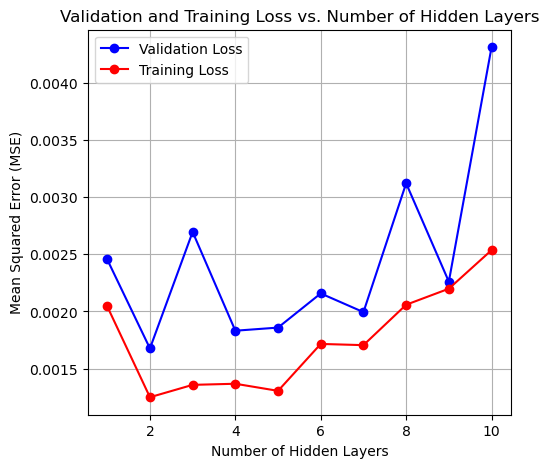

In [36]:
# plot the training and validation loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# plot losses for validation (blue) and training(red)
plt.plot(num_hidden_layers, val_losses_3, marker='o', color='b', label='Validation Loss')
plt.plot(num_hidden_layers, train_losses_3, marker='o', color='r', label='Training Loss')

# labels
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation and Training Loss vs. Number of Hidden Layers')
plt.legend()
plt.grid(True)

plt.show()

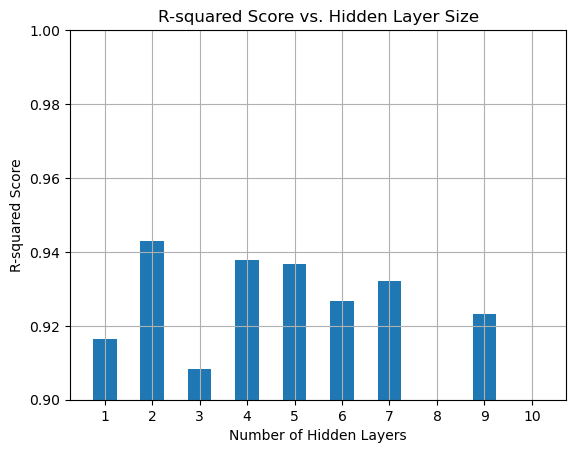

In [37]:
# create a bar plot showing the r-squared score for each model as a function of the number of hidden layers.
# r2 vs hidden layer bar plot
plt.bar(num_hidden_layers, r2_scores_3,width=0.5)
plt.xlabel('Number of Hidden Layers')
plt.xticks(num_hidden_layers)
plt.ylabel('R-squared Score')

# r clarity if the R-squared scores are close.
plt.ylim(0.9, 1.0)
plt.title('R-squared Score vs. Hidden Layer Size')
plt.grid(True)

plt.show()


4. Discussion: Analyze how the number of hidden layers affects model performance.
Highlight any trade-offs, such as overfitting in deeper models or underfitting in shallower
ones, and discuss the implications of adding more layers on generalization and model
complexity. [0.5pt]

The number of hidden layers can significantly impact model performance. For example, deeper networks can model complex functions with exponentially fewer neurons than shallow networks. This is more efficient and leads to better performance with the same amount of training data. However past a certain point overfitting can occur when the model becomes too complex and generalizes to training data, performing poorly on unseen data.

Part 4: Neural Network Comparison - Effect of batch size

1. Experiment with Batch Size: Build a neural network using the optimal number of
hidden layers determined in Part 3, with each layer containing the best number of units
identified in Part 2. Test different batch sizes: 8, 16, 32, 64, and 128. For each batch
size, record the R-squared score on the validation set and the total training time. [0.5pt]

In [40]:
# test different batch sizes: 8, 16, 32, 64, and 128
batch_sizes = [8, 16, 32, 64, 128]


# initialize for training and testing loss
b_train_losses = []
b_val_losses = []

# initialize for r2 score and training time
b_r2_scores = []
training_times = []

for batch_size in batch_sizes:
    # define model
    model = Sequential()
    
    # input
    model.add(Input(shape=(X_train.shape[1],))) 
    
    # loop hidden layers
    # optimal number of hidden layers determined in Part 3 - it changed but it was 7 the first time i ran it
    for _ in range(7):
        # best number of units identified in Part 2
        model.add(Dense(64, activation='sigmoid'))
    # output layer with a single neuron and linear activation
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    # set the optimizer to Adam and use Mean Squared Error (MSE) as the loss function
    model.compile(loss='mse', optimizer=Adam())

    # record start time for training
    start = time.time()

    # train the model with batch size change
    history = model.fit(X_train, y_train, 
                        batch_size=batch_size, 
                        epochs=50, 
                        validation_data=(X_test, y_test), 
                        verbose=0)
    
    end = time.time()
    
    # calculate the training time for each batch size
    training_time = end - start
    training_times.append(training_time)

    # store training and validation losses for batch sizes
    b_train_losses.append(history.history['loss'][-1])
    b_val_losses.append(history.history['val_loss'][-1])

    # calculate R-squared score for the validation data
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    # R2 score for the validation set for each batch size
    b_r2_scores.append(r2)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2. Performance and Time Evaluation: Plot the training and validation loss curves to
visualize the model's learning process. Additionally, plot the r-squared scores and
training times for each batch size using bar charts. [1pt]

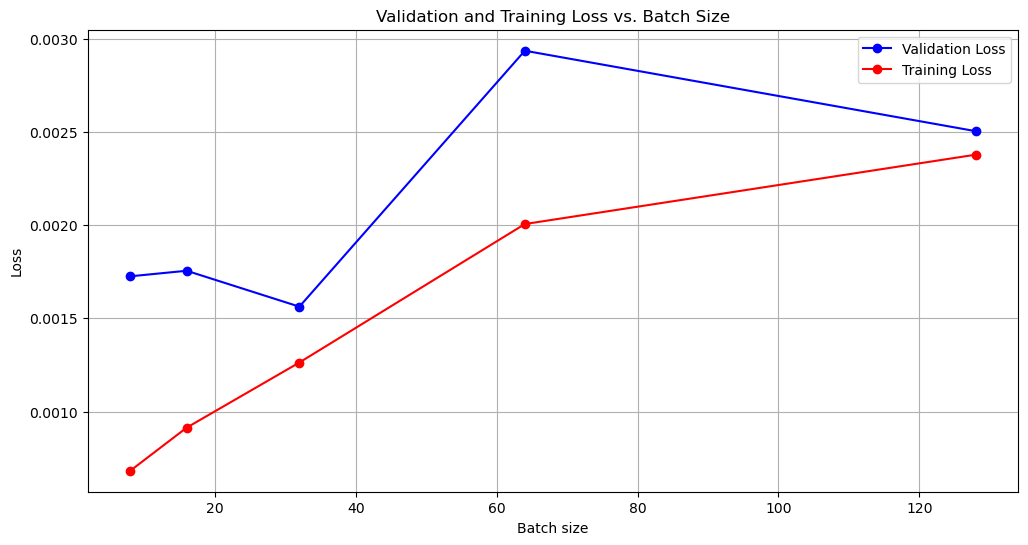

In [41]:
# plot the training and validation loss curves
plt.figure(figsize=(12, 6))

plt.plot(batch_sizes, b_val_losses, marker='o', color='b', label='Validation Loss')
plt.plot(batch_sizes, b_train_losses, marker='o', color='r', label='Training Loss')
plt.xlabel('Batch size')
plt.ylabel('Loss')
plt.title('Validation and Training Loss vs. Batch Size')
plt.legend()
plt.grid(True)

plt.show()

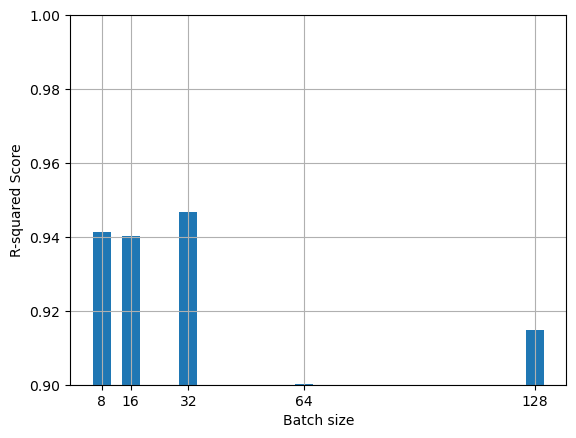

In [42]:
# r2 score bar chart
plt.bar(batch_sizes, b_r2_scores,width=5)
plt.xlabel('Batch size')
plt.xticks(batch_sizes)

# better clarity
plt.ylim(0.9, 1.0)

plt.ylabel('R-squared Score')
plt.grid(True)

plt.show()
# batch size of 16 was the best the first time i ran it so i'm sticking with this bc it changed to 32

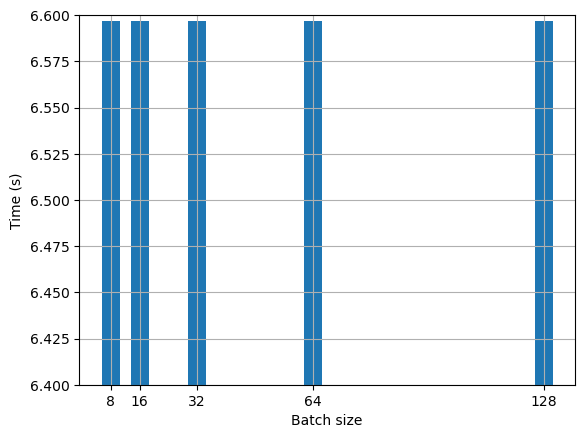

In [43]:
# time bar chart
plt.bar(batch_sizes, training_time,width=5)
plt.xlabel('Batch size')
plt.xticks(batch_sizes)

# clarity for s
plt.ylim(6.4, 6.6) 
plt.ylabel('Time (s)')
plt.grid(True)

plt.show()

# seem to be around the same time idk

3. Discussion: Analyze the impact of different batch sizes on training speed, learning
stability, and model convergence. Discuss the advantages and disadvantages of each
batch size, and explain the trade-offs between training efficiency and stability with larger
versus smaller batch sizes. [0.5pt]

It seemed that a batch size of 16 had the most accurate performance since it had the highest R2 score. Past this, loss increased significantly for both training and validation. Large batch sizes are typically understood to lead to faster training times but may result in lower accuracy and overfitting, seen in the lower R2 scores (especially around batch size of 128) while smaller batch sizes can provide better accuracy, but can be computationally expensive and time-consuming since they typically take longer. I personally did not observe a significant decrease in time but I know typically the time is supposed to decrease since it lets the model pass more data in a "batch". 

Part 5: Comparison with Linear Regression

1. Linear Regression Baseline: Build a simple linear regression model as a baseline for
comparison. [0.5pt]

In [44]:
# make model
linear_model = LinearRegression()

# train model 
linear_model.fit(X_train, y_train)

# predict on training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

2. Performance Comparison: Compare the best-performing neural network model (from
Parts 1-3) with the linear regression model in terms of r-squared score and other
relevant metrics. [0.5pt]

In [65]:
# Part 1
print("First Neural Network")
# MSE
print("MSE:",min(val_loss_1))
# R2
print("R2:",test_r2_1,"\n")

# Part 2
# MSE
print("Neural Network with hidden layer size of 64")
print("MSE:",min(val_losses_2))
# R2
print("R2:",max(r2_scores_2))
print("\n")

# Part 3
# MSE
print("Neural Network with 7 hidden layers")
print("MSE:",min(val_losses_3))
# R2
print("R2:",max(r2_scores_3))
print("\n")

# Linear
print("Linear regression model as control")
# MSE
print("MSE:",mse_test)
# R2
print("R2:",r2_test)

First Neural Network
MSE: 0.0023967232555150986
R2: 0.9185021149902135 

Neural Network with hidden layer size of 64
MSE: 0.002190228318795562
R2: 0.9255237392003365


Neural Network with 7 hidden layers
MSE: 0.0016759877325966954
R2: 0.9430099120440035


Linear regression model as control
MSE: 0.0063247081949443645
R2: 0.7849353831971441


3. Discussion: Discuss the differences in performance between the linear and neural
network models. Explain why the neural network may perform better or worse than the
linear model, considering aspects such as model complexity and data representation.
[1pt]

Neural network (NN) models performed significantly better since they are able to capture complex, nonlinear relationships across the data. A NN model has more layers that allows it to learn more complex relationships, it can learn patterns in data that Linear Regression cannot. 

Although making the model complexity can sometimes result in overfitting if the model is too complex, a moderate amount of model compelxity, depending on the data, will typically perform better than a simple model such as a linear regression model since it's able to better pick up patterns in the data and so, can better represent the data in accuracy. 